# 1. Contextualização

## 1.1. Metas e objetivos 

## 1.2. Estrutura do dataset

# 2. Preparação do ambiente
## 2.1. Importação das bibliotecas e carregamento dos dados

In [20]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Análise Exploratória de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Pré-processamento
from scipy.stats import zscore
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette('Dark2')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [21]:
df = pd.read_csv("../data/raw/bank-full.csv", sep = ';')

## 2.2. Revisando os dados

In [22]:
print(f"Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

Dataset possui 45211 linhas e 17 colunas.


In [23]:
print(f"O dataset possui: {len(df.select_dtypes(include = 'object').columns.to_list())} colunas categóricas.")
print(f"O dataset possui: {len(df.select_dtypes(include = 'number').columns.to_list())} colunas numéricas.")

O dataset possui: 10 colunas categóricas.
O dataset possui: 7 colunas numéricas.


In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [26]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- Será necessário LabelEncoding para a variável target (y);
- O dataset não apresenta dados nulos;
- Os dtype estão corretos;

# 3. Processamento dos dados

## 3.1. Limpeza e manipulação

In [27]:
# Transformação de y em uma variável binária. 

le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# 4. Análise Exploratória de Dados (EDA)

## 4.1. Estatísticas descritivas

In [48]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.16,257.53,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.76,3.10,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.20,100.13,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.58,2.30,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.12,0.32,0.0,0.0,0.0,0.0,1.0


In [49]:
df.select_dtypes(include = 'object').describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959


## 4.2. Análises univariadas

### Idade

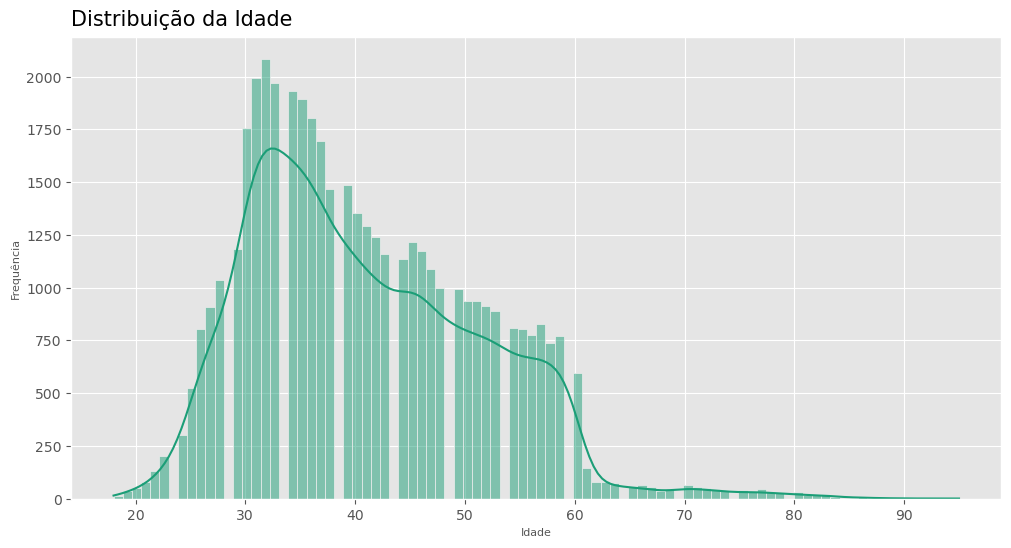

In [28]:
fig, ax = plt.subplots(figsize = (12,6))

sns.histplot(df.age, kde = True)
ax.set_title("Distribuição da Idade", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Idade", fontsize = 8)
ax.set_ylabel("Frequência", fontsize = 8)
plt.show()

In [33]:
print(f"A idade média dos clientes é de: {df['age'].mean()}")
print(f"A idade mediana dos clientes é de: {df['age'].median()}")
print(f"O desvio padrão da idade média clientes é de: {df['age'].std()}")

A idade média dos clientes é de: 40.93621021432837
A idade mediana dos clientes é de: 39.0
O desvio padrão da idade média clientes é de: 10.618762040975431


Existe um assimetria na distribuição da idade causada pela quantidade de clientes na terceira idade.

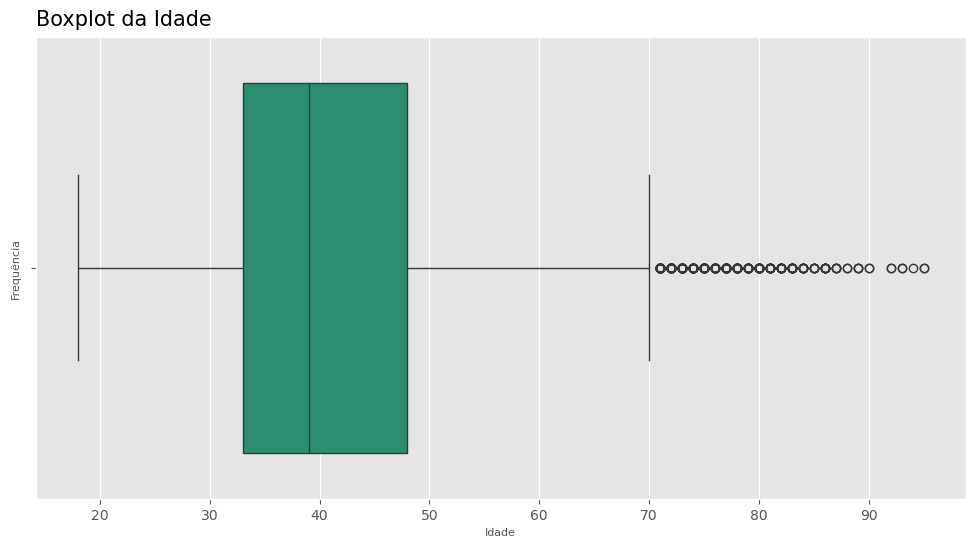

In [46]:
fig, ax = plt.subplots(figsize = (12,6))

sns.boxplot(df.age, orient = 'h')
ax.set_title("Boxplot da Idade", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Idade", fontsize = 8)
plt.show()

In [59]:
# Vamos checar quantos clientes acima dos 70 anos temos

filtro = df[df['age'] > 70].index
idosos = df.loc[filtro, 'age'].count()

print(f"O número de clientes acima dos 60 anos é {idosos}, eles são {round(((idosos / df.shape[0]) * 100), 2)}% do total.")

O número de clientes acima dos 60 anos é 487, eles são 1.08% do total.


A maioria dos clientes estão entre o meio de seus 30 anos e fim dos 40. Existe uma quantidade relavativamente baixa de idosos em relação ao restante. 

### Emprego

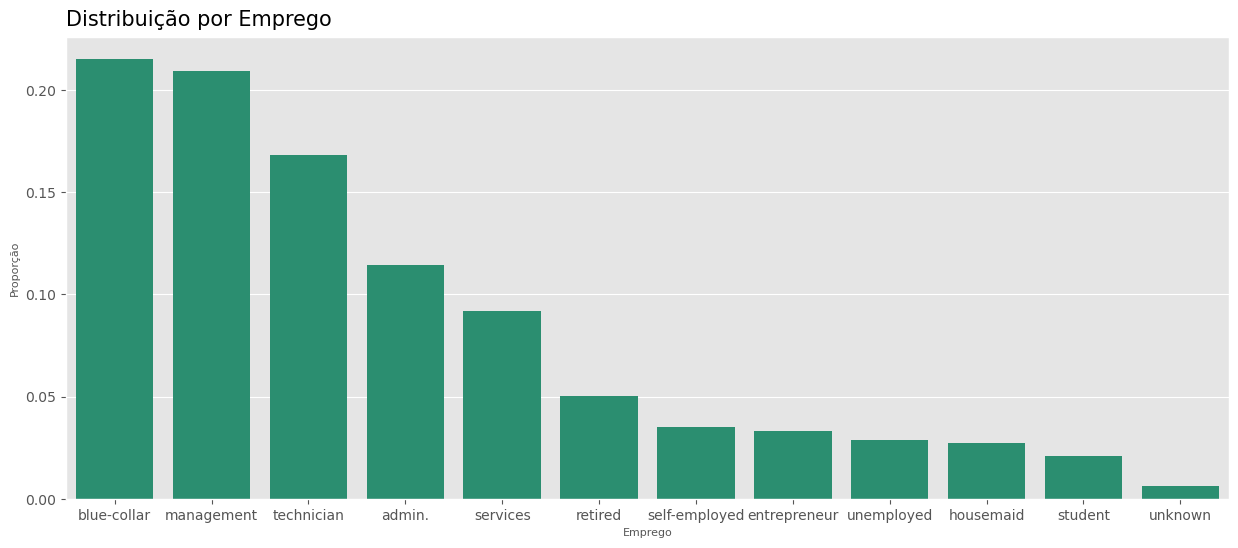

In [72]:
job_freq = df.job.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(job_freq, x = 'job', y = 'proportion')
ax.set_title("Distribuição por Emprego", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Emprego", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
plt.show()

No inglês "Blue-collar" se refere a empregos mais braçais, geralmente ligados a construção civil e prestação de serviços como operadores de máquinas, caminhoneiros, eletricistas e etc. Estes profissionais mais de 20% dos clientes do banco, seguidos por pessoas em cargos de gerência e técnicos. 

### Estado civil

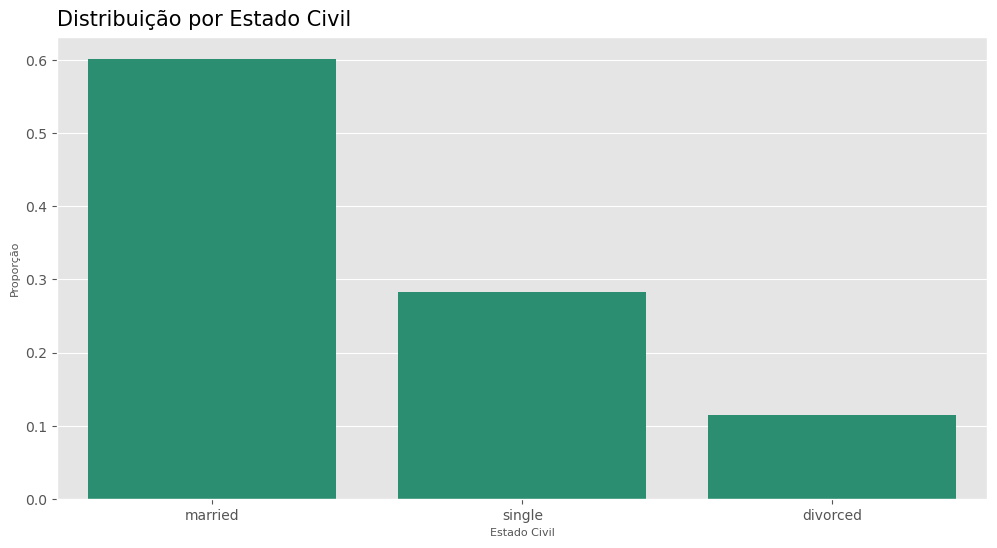

In [113]:
marital_freq = df.marital.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(marital_freq, x = 'marital', y = 'proportion')
ax.set_title("Distribuição por Estado Civil", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Estado Civil", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
plt.show()

### Educação

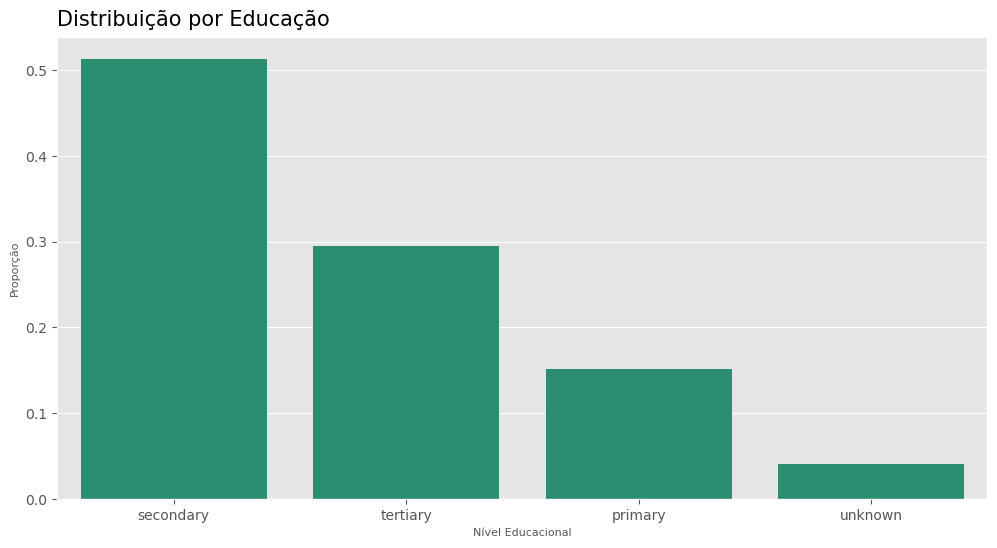

In [ ]:
ed_freq = df.education.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(ed_freq, x = 'education', y = 'proportion')
ax.set_title("Distribuição por Educação", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Nível Educacional", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
plt.show()

Quase 70% dos clientes do banco não possuem uma graduação, o que se reflete na alta quantidade de prestadores de serviços e técnicos entre eles. 

### Dívidas com o banco

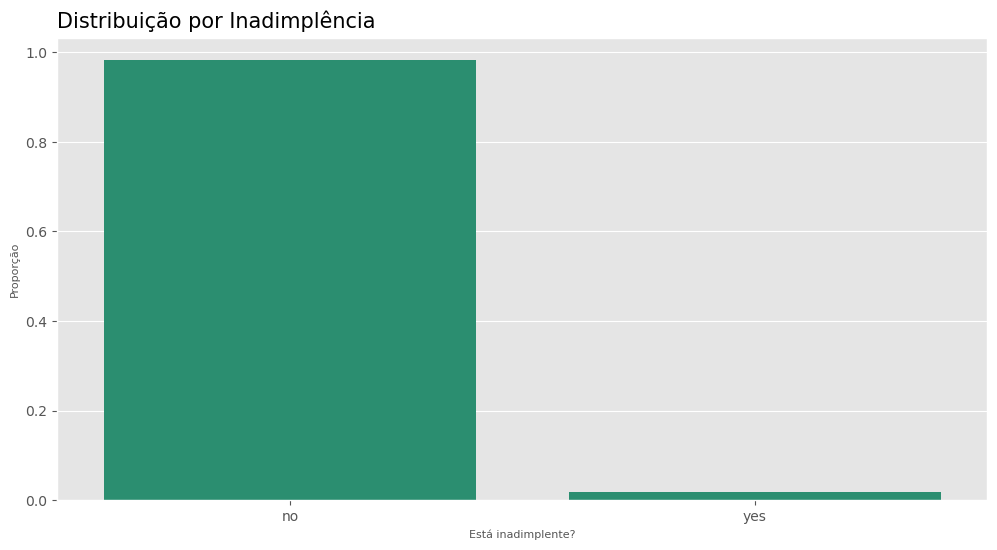

In [82]:
default_freq = df.default.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(default_freq, x = 'default', y = 'proportion')
ax.set_title("Distribuição por Inadimplência", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Está inadimplente?", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
plt.show()

### Balanço anual

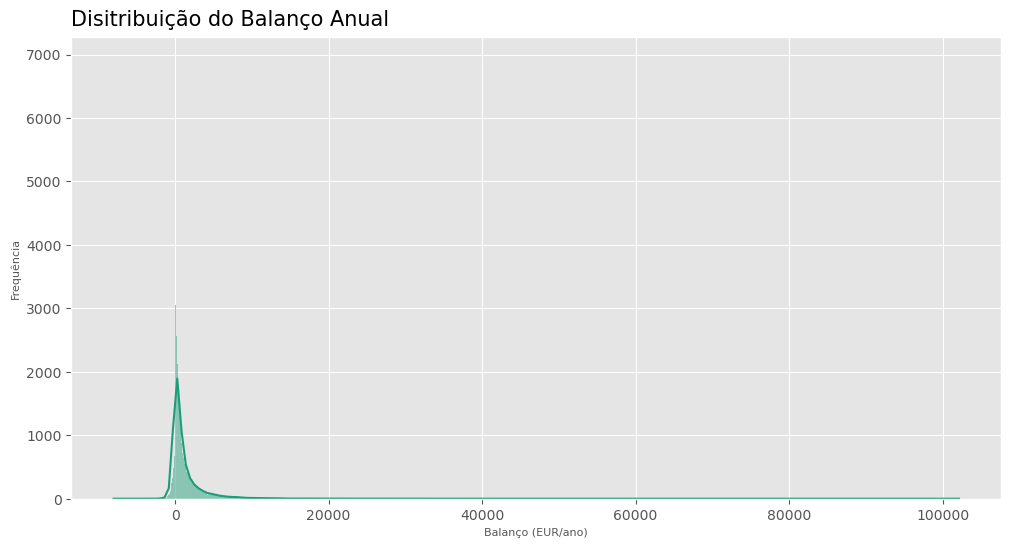

In [86]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.histplot(df.balance, kde = True)
ax.set_title("Disitribuição do Balanço Anual", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Balanço (EUR/ano)", fontsize = 8)
ax.set_ylabel("Frequência", fontsize = 8)
plt.show()

Naturalmente por se tratarem de dados bancários, a desigualdade economica vai se mostrar nesta variável. Acredito na necessidade de remoção dos outliers antes do treinamento do modelo de Machine Learning.

### Possui financiamento imobiliário?

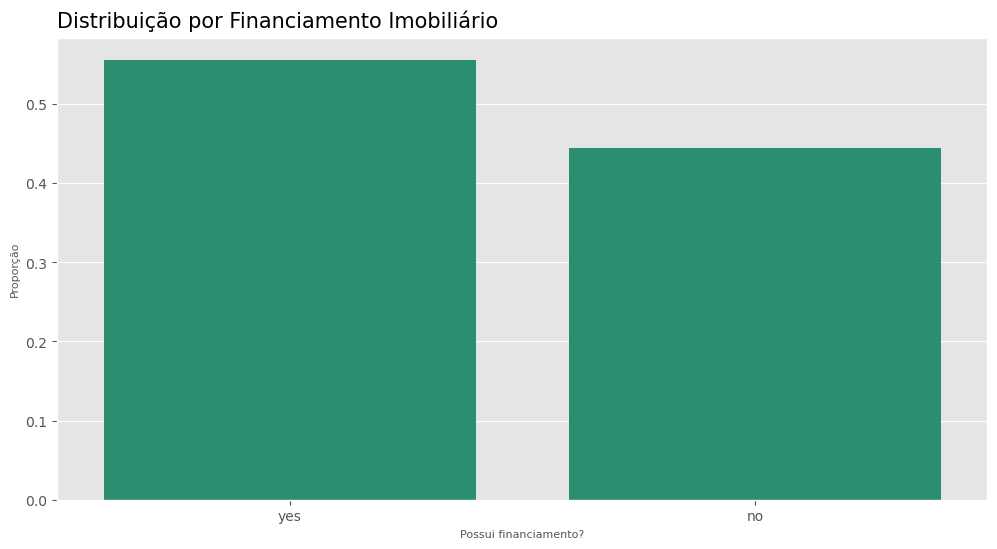

In [93]:
housing_freq = df.housing.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(housing_freq, x = 'housing', y = 'proportion')
ax.set_title('Distribuição por Financiamento Imobiliário', fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel('Possui financiamento?', fontsize = 8)
ax.set_ylabel('Proporção', fontsize = 8)
plt.show()

### Empréstimos

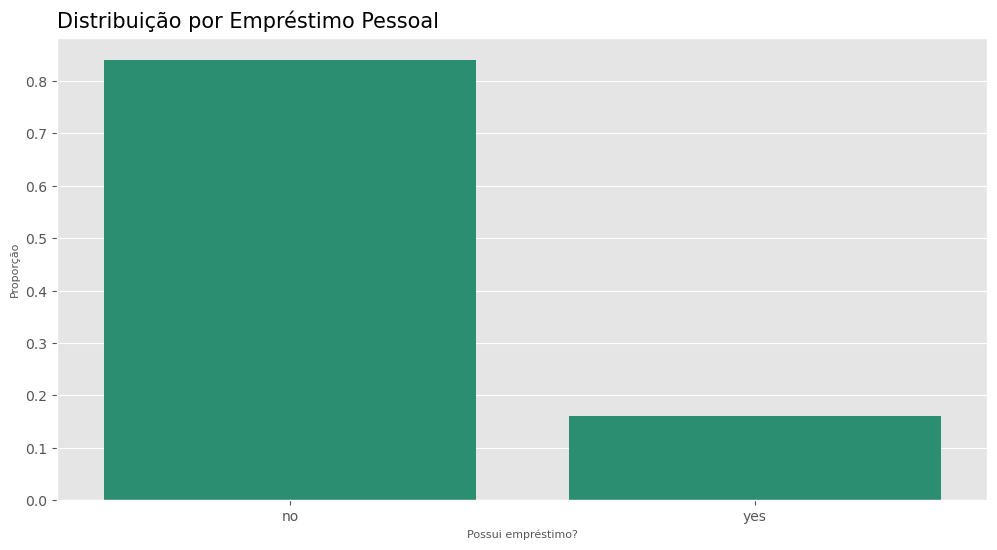

In [94]:
loan_freq = df.loan.value_counts(normalize=True).reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(loan_freq, x = 'loan', y = 'proportion')
ax.set_title('Distribuição por Empréstimo Pessoal', fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel('Possui empréstimo?', fontsize = 8)
ax.set_ylabel('Proporção', fontsize = 8)
plt.show()

### Meio de contato

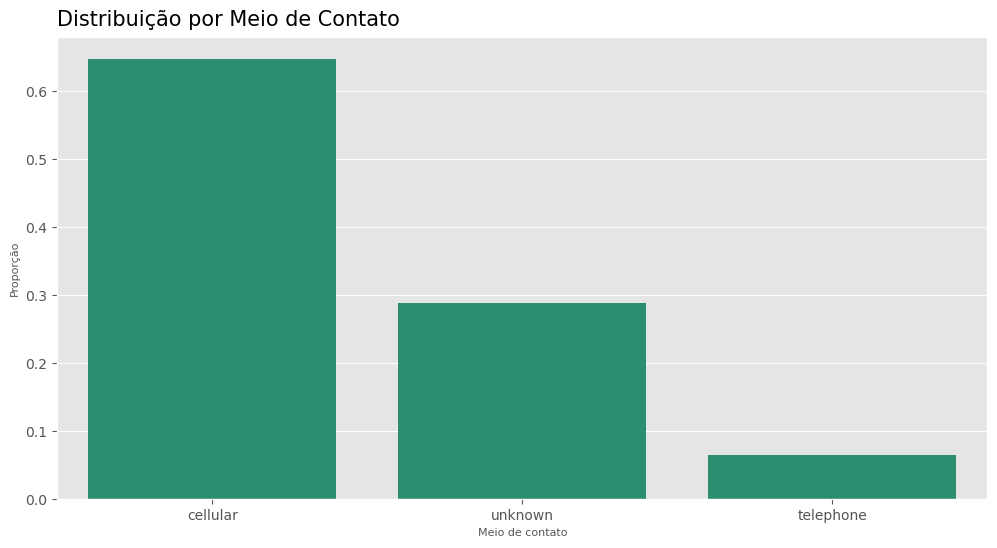

In [97]:
cont_freq = df.contact.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(cont_freq, x = 'contact', y = 'proportion')
ax.set_title('Distribuição por Meio de Contato', fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel('Meio de contato', fontsize = 8)
ax.set_ylabel('Proporção', fontsize = 8)
plt.show()

### Mês de contato

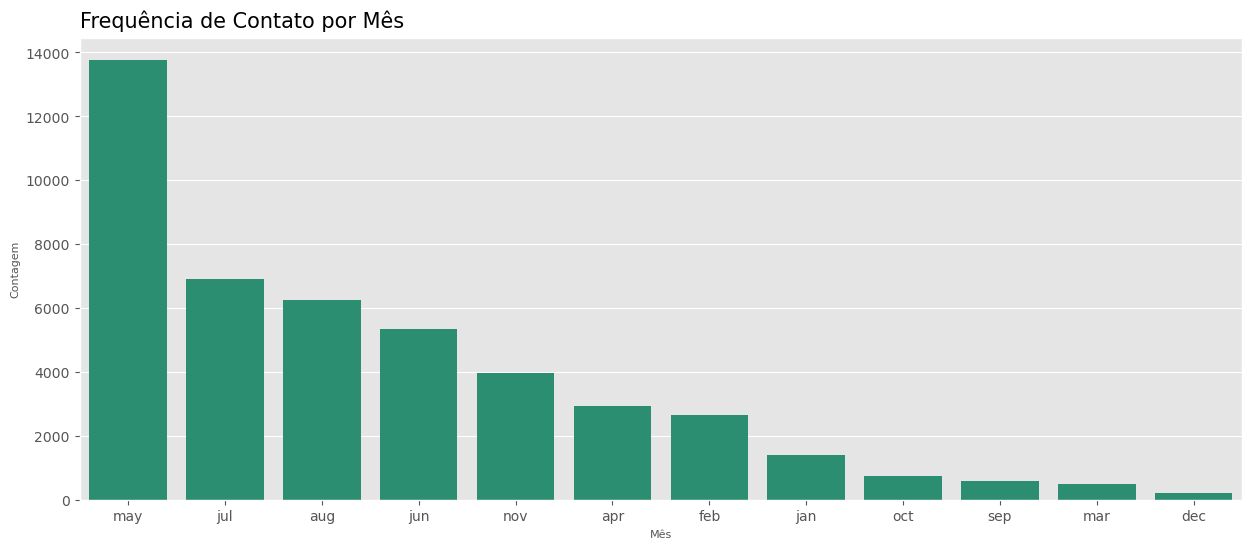

In [112]:
freq_month = df.month.value_counts().reset_index()

fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(freq_month, x = 'month', y = 'count')
ax.set_title('Frequência de Contato por Mês', fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel('Mês', fontsize = 8)
ax.set_ylabel('Contagem', fontsize = 8)
plt.show()